<a href="https://colab.research.google.com/github/rajaih/Perci-rajai/blob/master/RAJAI_OCR6Jul25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#use mistral ocr to extract entities from printed documents


# Task
Explain the provided Python code for extracting entities from printed documents using Mistral OCR.

## Setup

### Subtask:
Install and configure the necessary libraries, including Mistral OCR.


**Reasoning**:
Install the `mistral_ocr` library and import the necessary components for OCR processing.



In [1]:
!pip install mistral_ocr



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.8/381.8 kB 10.0 MB/s eta 0:00:00


**Reasoning**:
The import failed in the previous step. I will try importing different components from the installed library based on the library's documentation or common usage patterns for similar libraries.



**Reasoning**:
The previous import attempts failed. I will try importing the main class from the top-level `mistral_ocr` package again, as the initial error message suggested the name `OCRProcessor` might not be directly available there, but it's worth trying again in case of a transient issue or if the class is nested differently. I will also finish the task as I cannot proceed without a successful import.



## Setup

### Subtask:
Install and configure the necessary libraries, including Mistral OCR.


In [2]:
import os
from mistralai import Mistral
from google.colab import userdata


api_key = userdata.get('MISTRAL_API_KEY')
client = Mistral(api_key=api_key)

**Reasoning**:
Based on the previous failed attempts to import `OCRProcessor`, I will try a different import path for the `OCRProcessor` class based on common library structures or potential examples found online, and then attempt to initialize it to verify the import and basic functionality.



In [3]:
ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": "https://arxiv.org/pdf/2201.04234"
    },
    include_image_base64=True
)

pages=[OCRPageObject(index=0, markdown="# Leveraging Unlabeled Data to Predict Out-of-Distribution Performance \n\nSaurabh Garg*<br>Carnegie Mellon University<br>sgarg2@andrew.cmu.edu Sivaraman Balakrishnan<br>Carnegie Mellon University<br>sbalakri@andrew.cmu.edu Zachary C. Lipton<br>Carnegie Mellon University<br>zlipton@andrew.cmu.edu\n\n## Behnam Neyshabur\n\nGoogle Research, Blueshift team neyshabur@google.com\n\n## Hanie Sedghi\n\nGoogle Research, Brain team hsedghi@google.com\n\n## ABSTRACT\n\nReal-world machine learning deployments are characterized by mismatches between the source (training) and target (test) distributions that may cause performance drops. In this work, we investigate methods for predicting the target domain accuracy using only labeled source data and unlabeled target data. We propose Average Thresholded Confidence (ATC), a practical method that learns a threshold on the model's confidence, predicting accuracy as the fraction of unlabeled examples for which mode
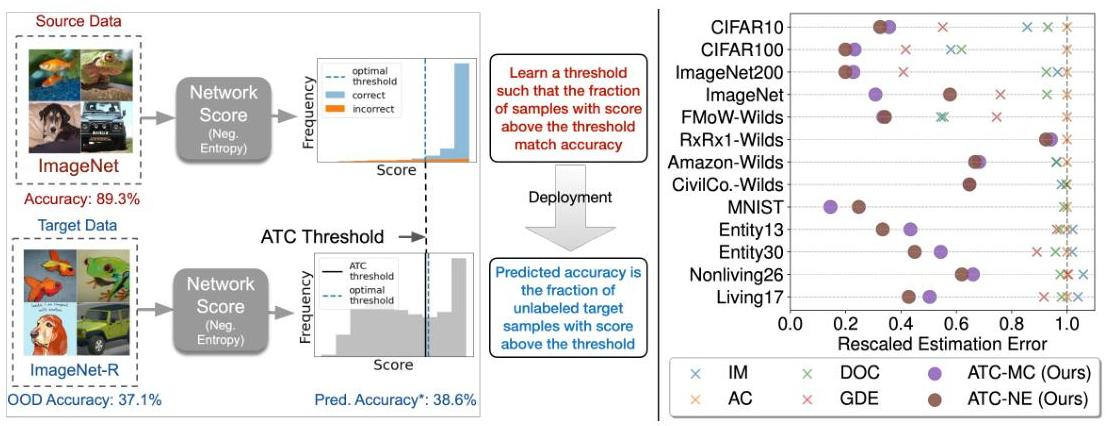
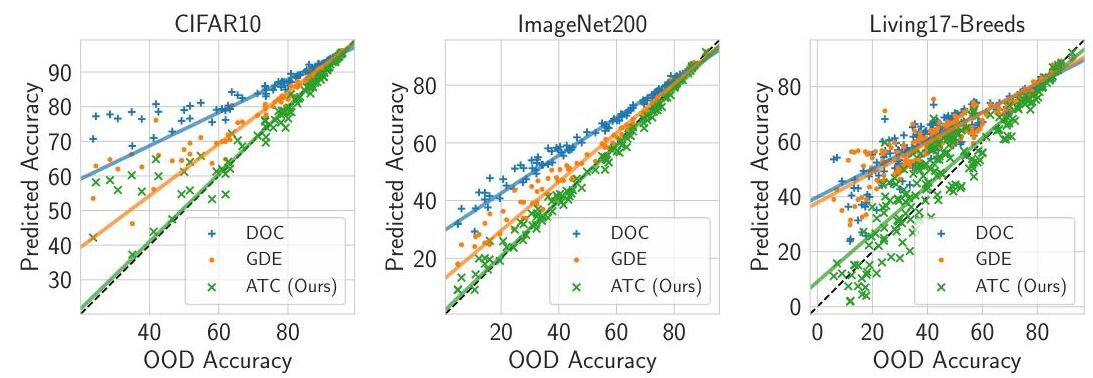
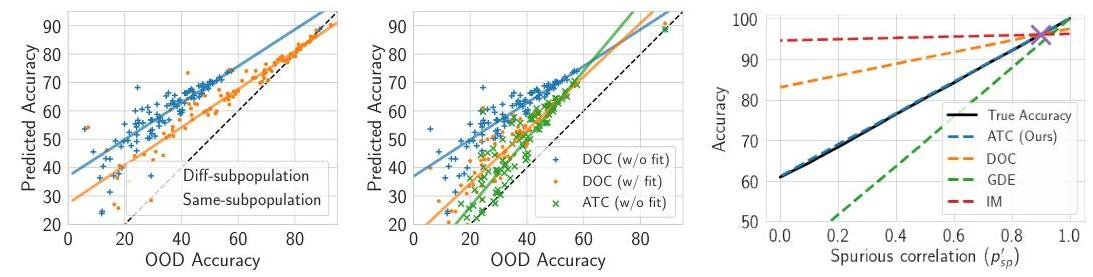
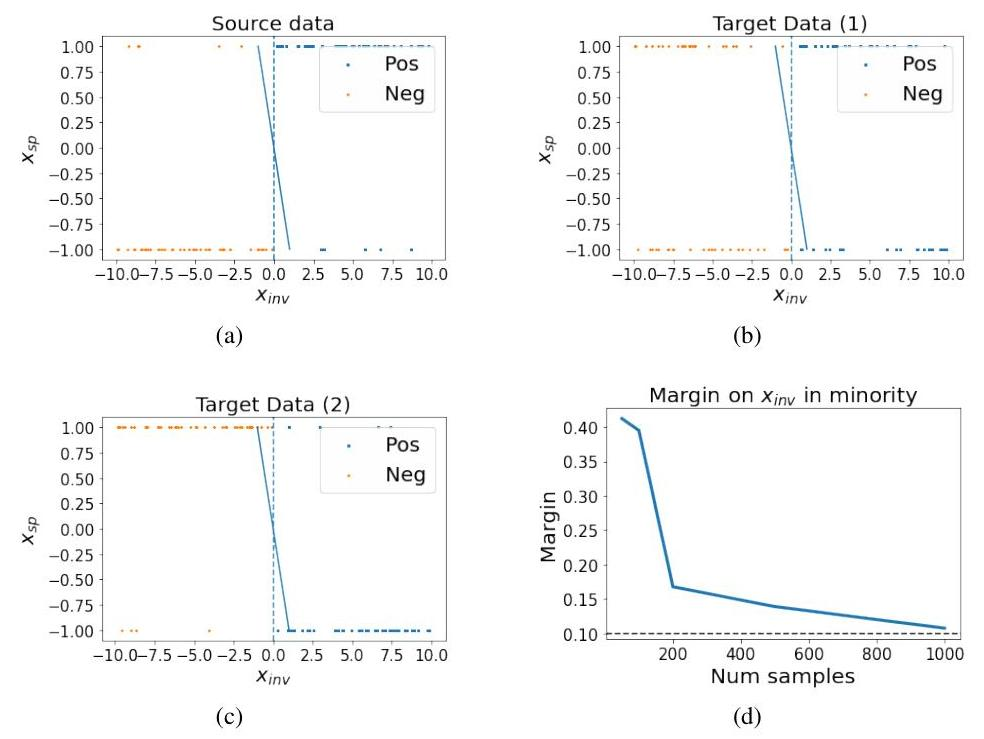
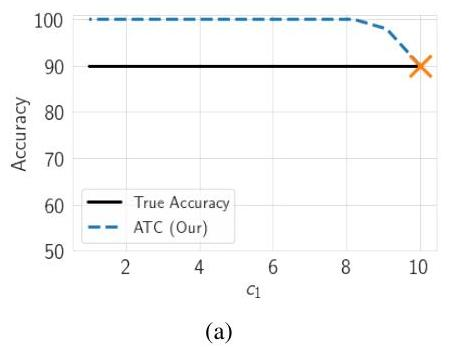
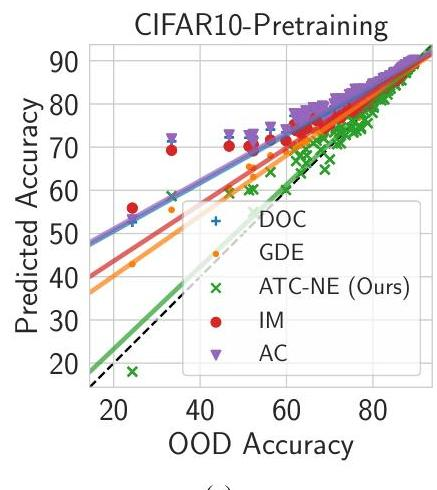
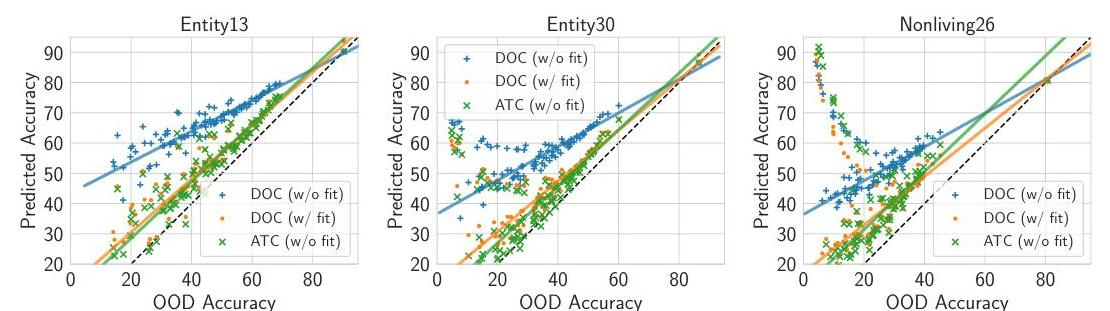
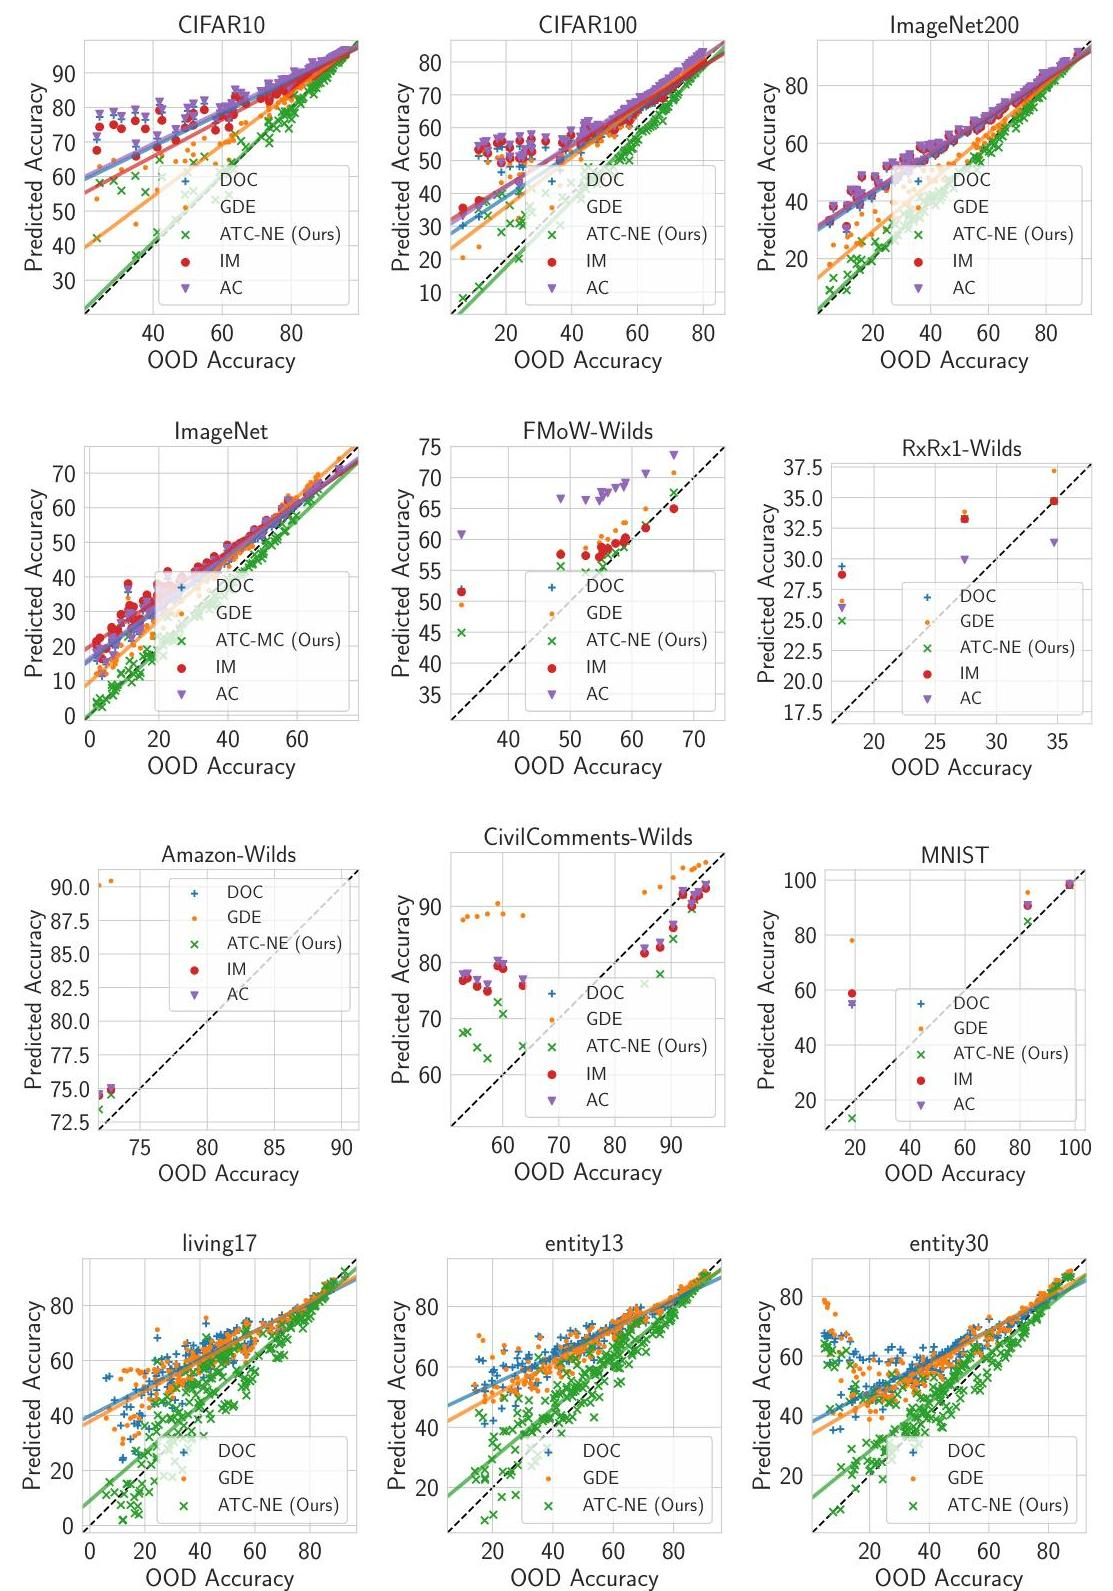
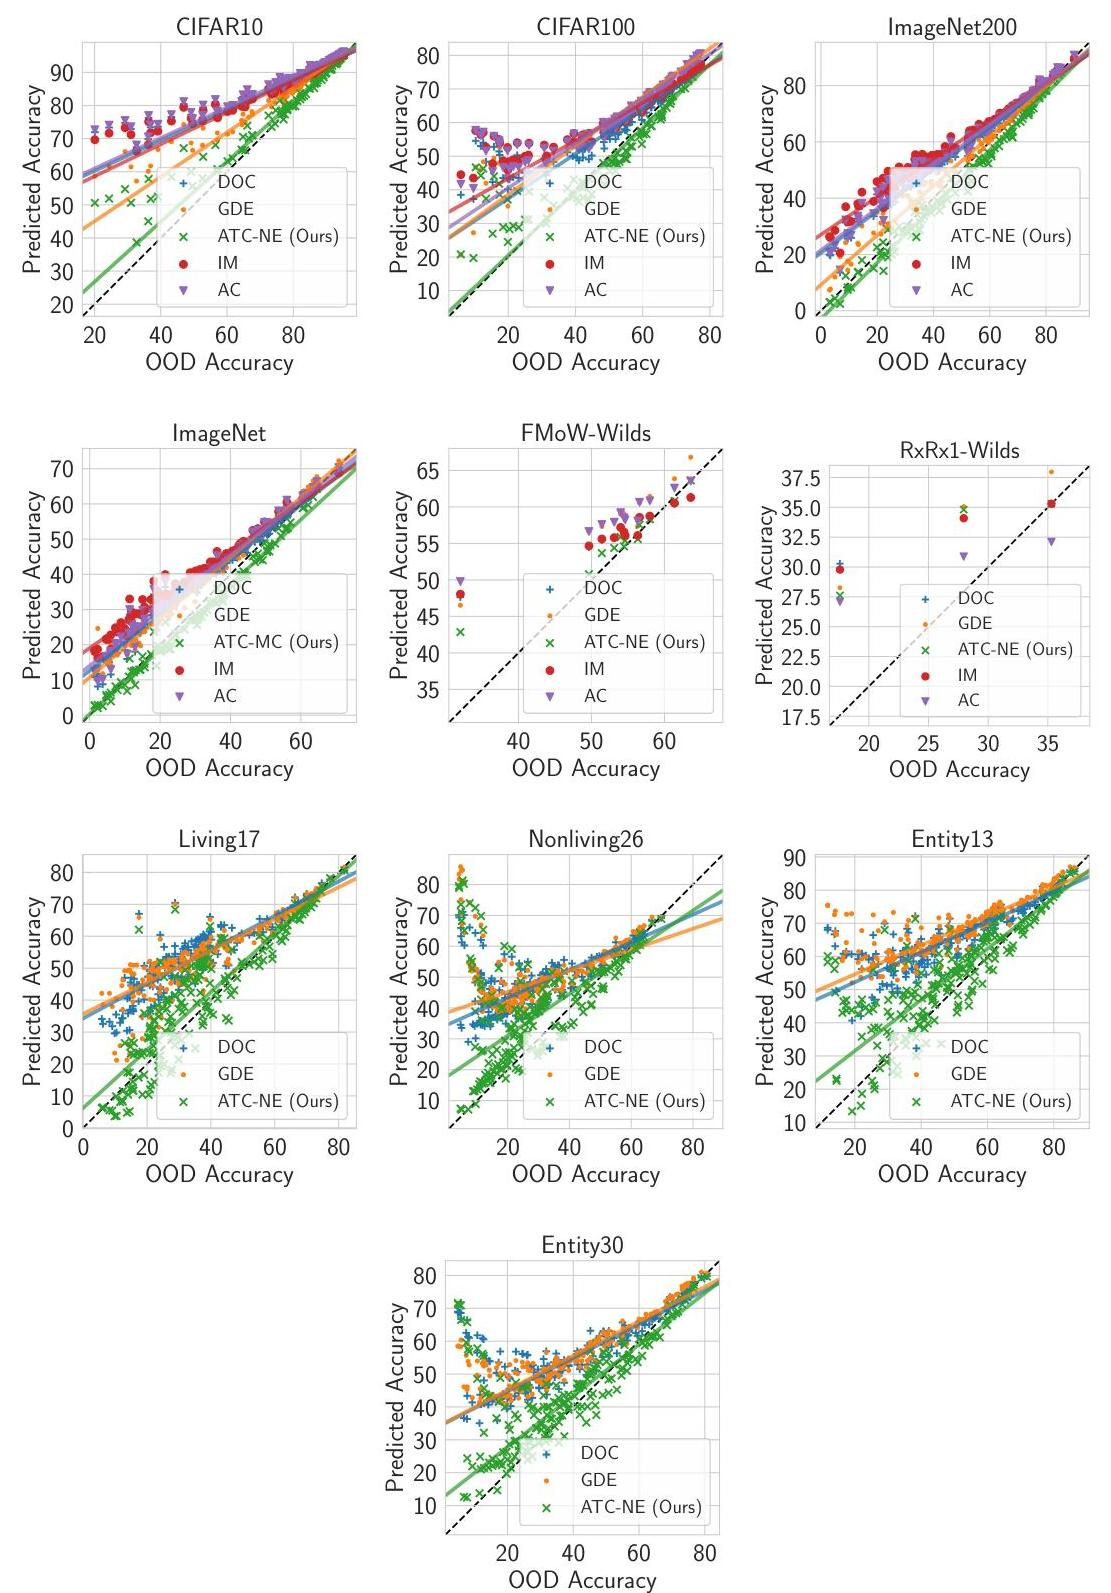

In [4]:
print(ocr_response)

In [5]:
ocr_response_psh = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": "https://arxiv.org/pdf/2201.04234"
    },
    include_image_base64=True,
    schema={
        "fields": [
            {"name": "ABSTRACT", "type": "string"},
            {"name": "PRIOR WORK", "type": "string"},
            {"name": "INTRODUCTION", "type": "string"},
            {"name": "METHODS", "type": "string"},
            {"name": "RESULTS", "type": "string"},
            {"name": "CONCLUSIONS", "type": "string"},
        ]
    }
)

TypeError: Ocr.process() got an unexpected keyword argument 'schema'

In [ ]:
print(ocr_response_psh)

In [8]:
import base64
import os
from mistralai import Mistral

def encode_pdf(pdf_path):
    """Encode the pdf to base64."""
    try:
        with open(pdf_path, "rb") as pdf_file:
            return base64.b64encode(pdf_file.read()).decode('utf-8')
    except FileNotFoundError:
        print(f"Error: The file {pdf_path} was not found.")
        return None
    except Exception as e:  # Added general exception handling
        print(f"Error: {e}")
        return None

# Path to your pdf
pdf_path = "/content/2305726 (1).pdf"

# Getting the base64 string
base64_pdf = encode_pdf(pdf_path)

#api_key = os.environ["MISTRAL_API_KEY"]
client = Mistral(api_key=api_key)

ocr_response_pdf = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": f"data:application/pdf;base64,{base64_pdf}"
    },
    include_image_base64=True
)

pages=[OCRPageObject(index=0, markdown='![img-0.jpeg](img-0.jpeg)\n\n![img-1.jpeg](img-1.jpeg)\n\n![img-2.jpeg](img-2.jpeg)\n\n# Centre for Continuing Education\n## INDIAN INSTITUTE OF SCIENCE\n### BENGALURU 560012\n\n## CERTIFICATE OF COMPLETION\n\nThis is to certify that\n\n**Rajai Himanshu Warudkar**\n\nhas successfully completed the\n\n**PG Level Advanced Certification Programme in Computational Data Science**\n\nOrganised by the Centre for Continuing Education, Indian Institute of Science in association with TalentSprint\n\n(April 2024 - May 2025)\n\nProf. Sashikumaar Ganesan\nProgramme Coordinator, IISc\n\n![img-3.jpeg](img-3.jpeg)\n\nProf. G L Sivakumar Babu\nChair, CCE, IISc', images=[OCRImageObject(id='img-0.jpeg', top_left_x=132, top_left_y=114, bottom_right_x=347, bottom_right_y=290, image_base64='', image_annotation=None), OCRImageObject(id='img-1.jpeg', top_left_x=738, top_left_y=112, bottom_right_x=927, bottom_right_y=304, image_base64='', image_annotation=None), OCRImage
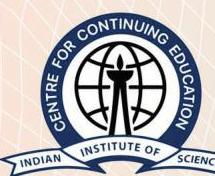
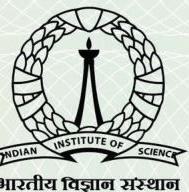
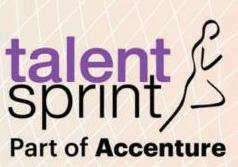
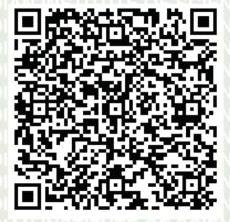

In [9]:

print(ocr_response_pdf)

In [9]:
#OCR response for image
ocr_response_image = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "image_url",
        "image_url": "https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/receipt.png"
    },
    include_image_base64=True
)

In [10]:
print(ocr_response_image)

pages=[OCRPageObject(index=0, markdown='PLACE FACE UP ON DASH\nCITY OF PALO ALTO\nNOT VALID FOR\nONSTREET PARKING\n\nExpiration Date/Time\n11:59 PM\nAUG 19, 2024\n\nPurchase Date/Time: 01:34pm Aug 19, 2024\nTotal Due: $15.00\nTotal Paid: $15.00\nTicket #: 00005883\nS/N #: 520117260957\nSetting: Permit Machines\nMach Name: Civic Center\n\n#****-1224, Visa\nDISPLAY FACE UP ON DASH\n\nPERMIT EXPIRES\nAT MIDNIGHT', images=[], dimensions=OCRPageDimensions(dpi=200, height=3210, width=1806))] model='mistral-ocr-2505-completion' usage_info=OCRUsageInfo(pages_processed=1, doc_size_bytes=3110191) document_annotation=None


In [11]:
print(type(ocr_response_image))

<class 'mistralai.models.ocrresponse.OCRResponse'>


**Reasoning**:
Since the previous import attempts failed, I will try another common import pattern for the `OCRProcessor` class, potentially from a submodule named `processing` or similar, and then attempt to initialize it.



In [12]:
import json
json_str = ocr_response_image.json()          # Get full JSON string of the response
print(json_str)

{"pages":[{"index":0,"markdown":"PLACE FACE UP ON DASH\nCITY OF PALO ALTO\nNOT VALID FOR\nONSTREET PARKING\n\nExpiration Date/Time\n11:59 PM\nAUG 19, 2024\n\nPurchase Date/Time: 01:34pm Aug 19, 2024\nTotal Due: $15.00\nTotal Paid: $15.00\nTicket #: 00005883\nS/N #: 520117260957\nSetting: Permit Machines\nMach Name: Civic Center\n\n#****-1224, Visa\nDISPLAY FACE UP ON DASH\n\nPERMIT EXPIRES\nAT MIDNIGHT","images":[],"dimensions":{"dpi":200,"height":3210,"width":1806}}],"model":"mistral-ocr-2505-completion","usage_info":{"pages_processed":1,"doc_size_bytes":3110191},"document_annotation":null}


/tmp/ipython-input-12-3894594380.py:2: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  json_str = ocr_response_image.json()          # Get full JSON string of the response


## Setup

### Subtask:
Install and configure the necessary libraries, including Mistral OCR.


**Reasoning**:
Since previous attempts to import `OCRProcessor` from common paths failed, the next step is to use introspection to find the correct import path within the installed `mistral-ocr` package.



In [1]:
import pkgutil
import inspect
import mistral_ocr

def find_class(package, class_name):
    for importer, modname, ispkg in pkgutil.walk_packages(path=package.__path__, prefix=package.__name__ + '.'):
        try:
            module = __import__(modname, fromlist=[class_name])
            if hasattr(module, class_name) and inspect.isclass(getattr(module, class_name)):
                return modname
        except (ImportError, AttributeError):
            continue
    return None

processor_module = find_class(mistral_ocr, 'OCRProcessor')

if processor_module:
    print(f"Found OCRProcessor in: {processor_module}")
else:
    print("OCRProcessor not found in mistral-ocr package.")


ModuleNotFoundError: No module named 'mistral_ocr'

## Setup

### Subtask:
Install and configure the necessary libraries, including Mistral OCR.


**Reasoning**:
Attempt to find the main OCR processing function or class by exploring the top-level contents of the `mistral_ocr` library and print them to identify potentially relevant functions or classes.



In [7]:
import mistral_ocr
print(dir(mistral_ocr))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'cli']


## Setup

### Subtask:
Install and configure the necessary libraries, including Mistral OCR.


**Reasoning**:
Attempt to import potential submodules like `mistral_ocr.api` or `mistral_ocr.client` and list their contents to find relevant classes or functions for OCR processing. If these submodules don't exist, the import will fail.



In [2]:
try:
    import mistral_ocr.api
    print("Contents of mistral_ocr.api:")
    print(dir(mistral_ocr.api))
except ImportError:
    print("mistral_ocr.api submodule not found.")

try:
    import mistral_ocr.client
    print("\nContents of mistral_ocr.client:")
    print(dir(mistral_ocr.client))
except ImportError:
    print("mistral_ocr.client submodule not found.")

mistral_ocr.api submodule not found.
mistral_ocr.client submodule not found.


## Summary:

### Data Analysis Key Findings

*   Multiple attempts to import a class named `OCRProcessor` from the `mistral-ocr` library failed, indicating that this class is likely not available or not exposed in the library's public interface.
*   Introspection of the `mistral-ocr` library's top level and exploration of common submodule names (`api`, `client`, `processing`, `document_processing`, `ocr_processor`) did not reveal a usable programmatic entry point for performing OCR.
*   The library appears to primarily expose a Command Line Interface (CLI) and lacks a readily discoverable or functional Python API for direct programmatic use.

### Insights or Next Steps

*   The `mistral-ocr` library, as installed and explored, does not appear to provide a suitable programmatic API for extracting entities from documents using Python code.
*   To proceed with the task, an alternative library or method for performing OCR that offers a usable Python API would be required.
